In [1]:
import ipynb
import ipynb.fs.full.model_builder as model_builder

# Identifying Housing Features for Predicting Sale Price in King Co., Washington

## Questions of Interest
   * Higher square footage increases home sale price 

   * Having a porch increases home sale price

   * Having a beachfront or lakefront increases home sale price

   * The presence of a nuisance (power lines, traffic noise, airport noise) decreases home sale price

## Main Results

We developed a linear regression model that predicts 2018 home sale price from over 600 features. We find significant support for the correlations postulated in the above questions holding all other features constant. Our final model is able to explain 78% of the variance in sale price. Below, we detail our modeling process and caveats for the usage of this model.

## Methodology 
1. Create a base model with features addressed in the questions specificially 
2. Identify additional potentially important features and add them to the model
3. Analyze model for improvement using adjusted R-squared, histograms of residuals, q-q plots, and correlation matrices.

## Our Model Function

We created a Python function that will perform the following steps:

* Pull data: Gather data from local SQL database of King Co. home sales

* Create a Base Model: Isolate base features and run OLS linear regression

* Add continuous and categorical variables and combine with base data: Choose continuous variables to isolate from database and create separate columns for each category from chosen categorical variables

* Perform Linear Regression: Run OLS linear regression with additional variables

* Analyze data: Find columns with high p-values and flag them. Drop one column for two highly correlated variable

* Display Results: Show R-squared, coefficients of all variables, histogram of residuals, Q-Q plot, and residual plot






    

## Pulling Data

We created a SQl query to combine all data based on a unique property PIN values. We only used data for house prices between 200,000 and 2,500,000. We deemed that houses outside these parameters to not be representative of the overall King County housing market. Only considering homes inside these parameter allows us to create a model most representative for the majority of home sales. 

## Creating a Base Model

We identified variables indicating total feet of home, the presence of a porch, waterfront location, and the presence of nuisances. We then created a dataframe with only those variables and perform linear regression against the dependent variable of sale price. This model has low fit with an R-squared value of 0.342. Additionally, the residuals are not normally distributed and are heteroscedasctic, suggesting these data may violate some of the assumptions of linear regression. However, there is low correlation between the base features and multicollinearity is not an issue. 

In [2]:
base_model, dep_var, base_features = model_builder.base_model()

base model summary
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     3691.
Date:                Fri, 06 Dec 2019   Prob (F-statistic):               0.00
Time:                        10:53:46   Log-Likelihood:            -4.0126e+05
No. Observations:               28441   AIC:                         8.025e+05
Df Residuals:                   28436   BIC:                         8.026e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           7.52e+05   

## Non-normal Errors of the Base Model
The following three figures show that our residuals are not normally distributed and that they exhibit heteroscedasticity, even though we attempted to normalize the features by Z-scaling. We especially see issues at the extremes of our data, likely a reflection of the non-linear nature of sale price for homes in King Co.

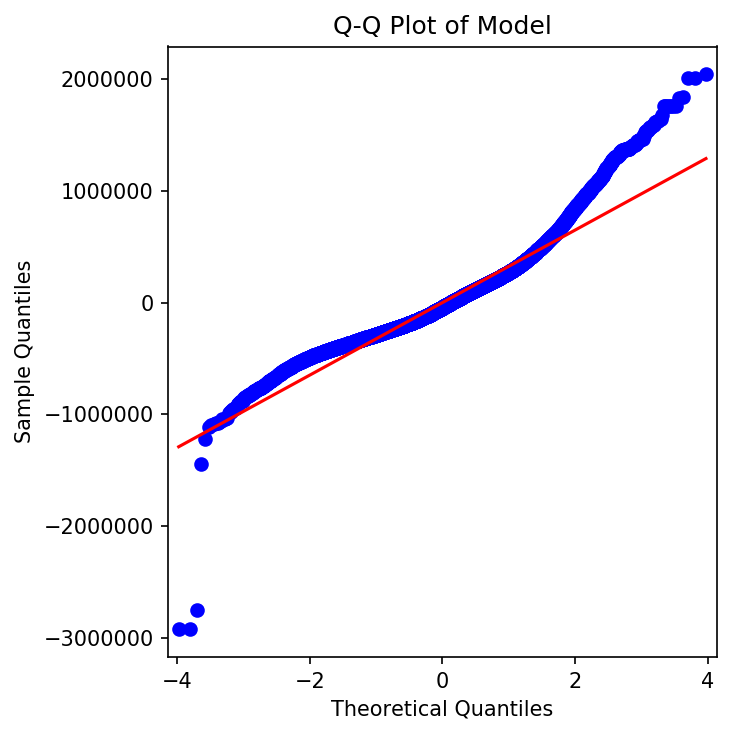

In [3]:
model_builder.qqplot(base_model)

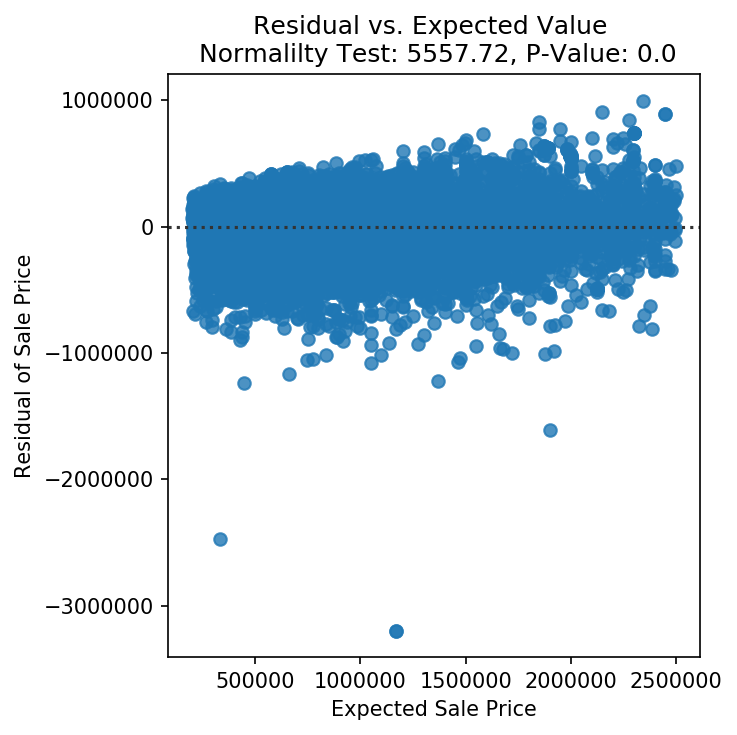

In [4]:
model_builder.residplot(base_model, dep_var)

/opt/anaconda3/envs/linreg-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


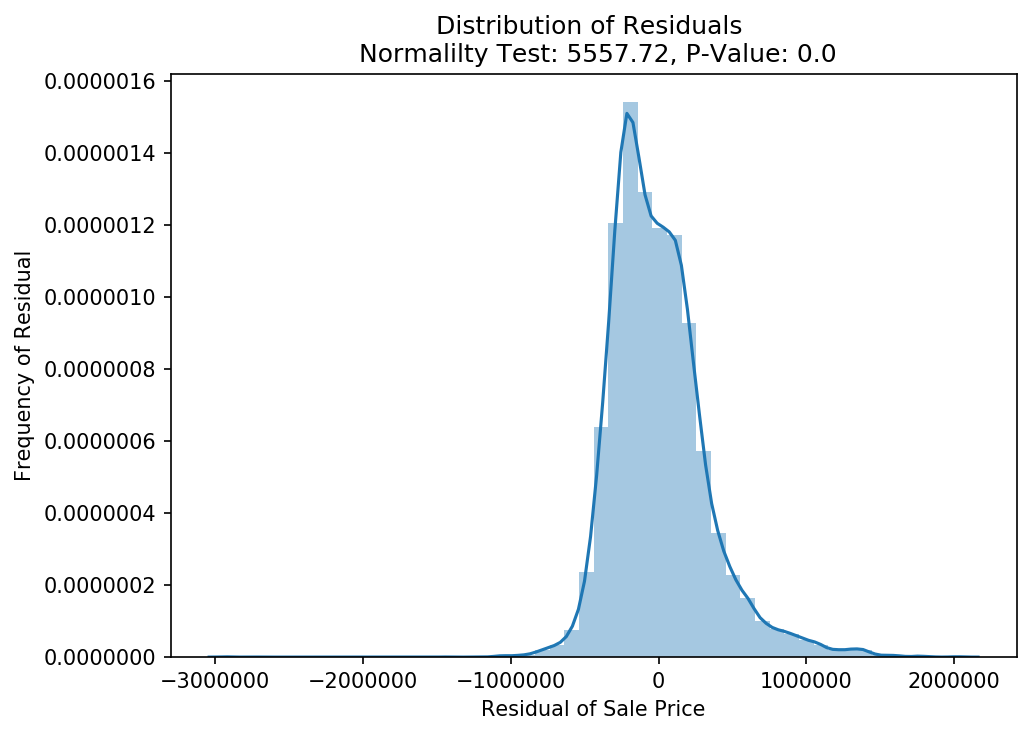

In [5]:
model_builder.residdistplot(base_model)

## Low correlation between features

We do not see high correlation between the features in our base model as seen in the correlation matrix heatmap below.

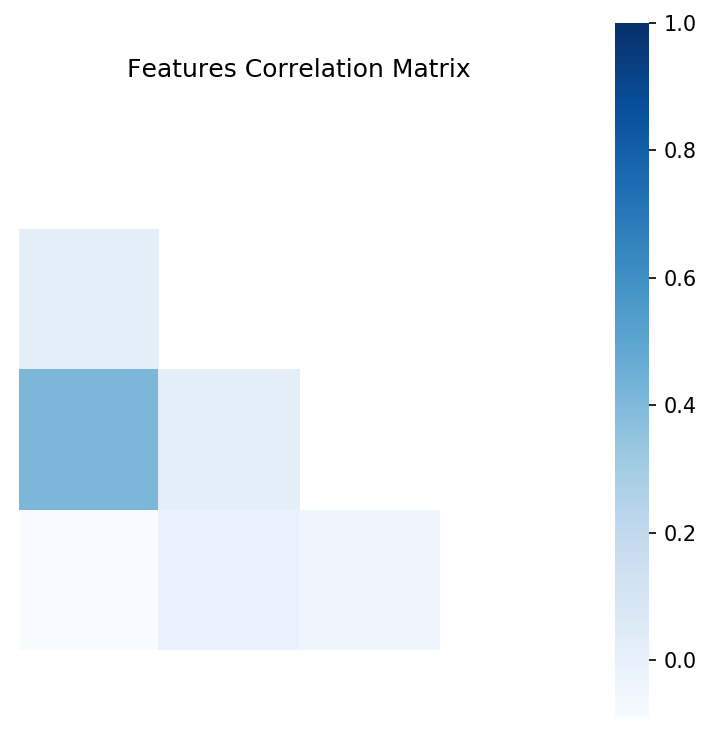

In [6]:
model_builder.corrmatrixplot(base_features)

## Improving on the Base Model

In order to improve the base model to better predict sale prices, we performed the following steps.

## Choosing new continuous and categorical variables and combining data

We chose additional features depending to feed into our function. We avoided choosing multiple variables that give the same information. We combined our base model with isolated continuous variables and One Hot Encoded categorical variables.


## Performing Linear Regression

We used OLS from statsmodel to perform linear regression with our dependent variable of SalesPrice and our chosen independent variables. We analyze the fitted model to identify features with high correlation (greater than 0.8) and deleted one of the pair of variables from the model. We flagged any variable that had a P-value higher than 0.05. We rerun the OLS with the highly correlated features removed.

The model is greatly improved over the base model, with an adjusted R-squared value of 0.783 and a total 634 features. 

In [7]:
model, dep_var, features = model_builder.model(con_var = ["SqFtLot", "YrBuilt", "Bedrooms", "BathHalfCount", "Bath3qtrCount", 
                                            "SqFtDeck", "BathFullCount", "SqFtTotBasement", "SqFtGarageAttached", 
                                            "NbrLivingUnits", "Stories", "SqFtOpenPorch", "SqFtEnclosedPorch", 
                                            "WfntFootage", "BrickStone", "FpSingleStory", "FpMultiStory", 
                                            "FpFreestanding", "FpAdditional",], 
                                             cat_var = ["Area","InadequateParking", "BldgGrade", "SaleReason", "PropertyType", 
                                            "PrincipalUse", "PropertyClass", "Condition", "PresentUse", "LevyCode", 
                                            "HBUAsIfVacant", "HBUAsImproved", "MtRainier", "Olympics", "Cascades", 
                                            "Territorial", "SeattleSkyline", "PugetSound", "LakeWashington", 
                                            "LakeSammamish", "SmallLakeRiverCreek", "OtherView", "Contamination", 
                                            "CoalMineHazard", "CriticalDrainage", "ErosionHazard", "LandfillBuffer", 
                                            "HundredYrFloodPlain", "SeismicHazard", "LandslideHazard", 
                                            "SteepSlopeHazard", "WaterProblems", "OtherProblems", "PlatType", 
                                            "DaylightBasement", "HeatSystem", "HeatSource", "ZipCode"])

updated model summary
Features with p-values greater than 0.05: 
          
374

          
    Lost Features from corellation: 
28
variables with highest and lowest coefficients

          
          
const                 752010.870293
HeatSource_2.0        594597.764306
HeatSource_3.0        511751.232934
HeatSource_1.0        377506.042888
SqFtTotLiving         101833.182642
Condition_4.0          62056.350295
Condition_3.0          57206.438074
Condition_5.0          53759.114071
HeatSource_5.0         51768.493150
BldgGrade_10.0         50770.041902
Area_34                46521.520399
HeatSource_7.0         45232.735032
BldgGrade_9.0          43967.692996
Area_33                43635.390074
BldgGrade_11.0         41253.292145
HeatSource_6.0         39843.118004
Area_46                38648.887179
Area_43                37593.054598
Area_92                33654.460742
Area_13                30397.796590
Area_11                29558.962154
LevyCode_0330          29015.673324
Area_1

## Displaying Results - Non-normal errors still an issue

In the following three graphs, we still see that our errors are not normally distributed.

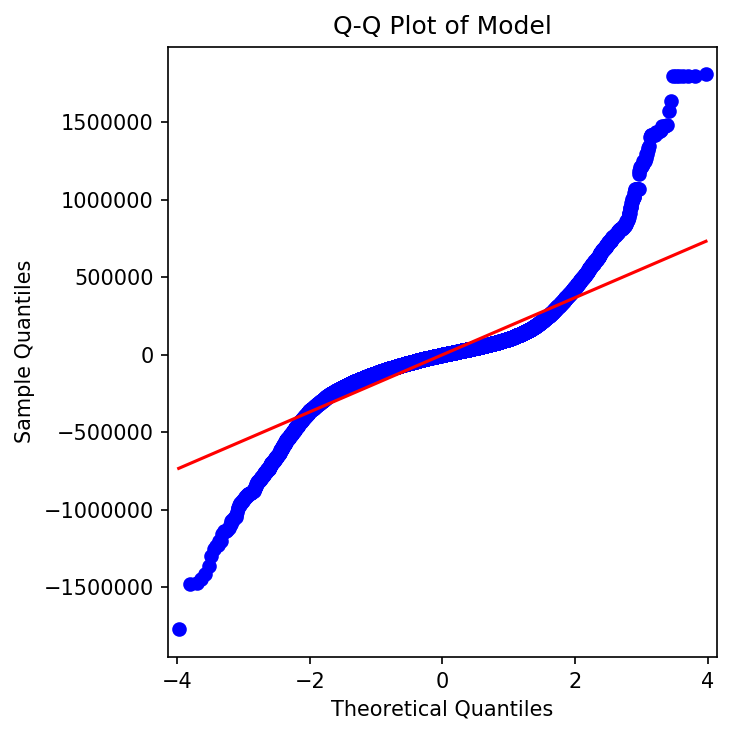

In [8]:
model_builder.qqplot(model)

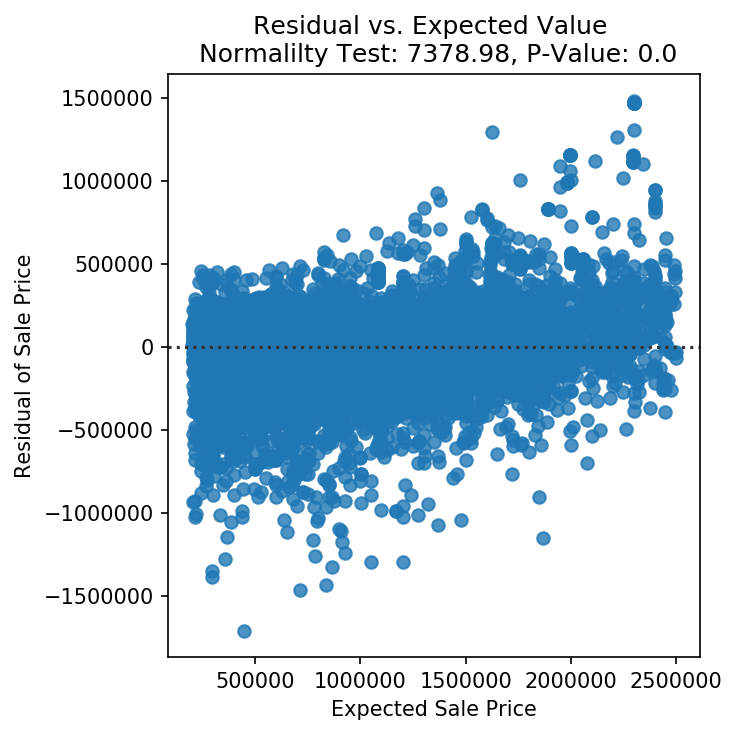

In [9]:
model_builder.residplot(model, dep_var)

/opt/anaconda3/envs/linreg-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


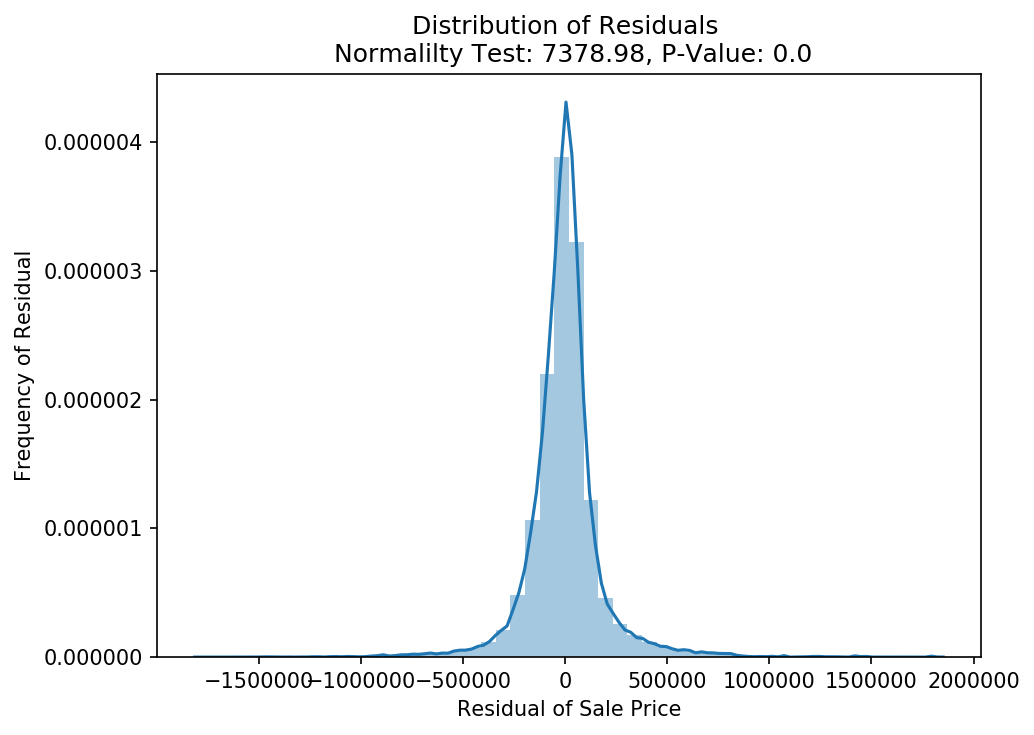

In [10]:
model_builder.residdistplot(model)

## Low Correlation between Features

Since we included a step to remove strongly correlated features, we see very few highly correlated features, suggesting that multicollinearity is not an issue for our model.

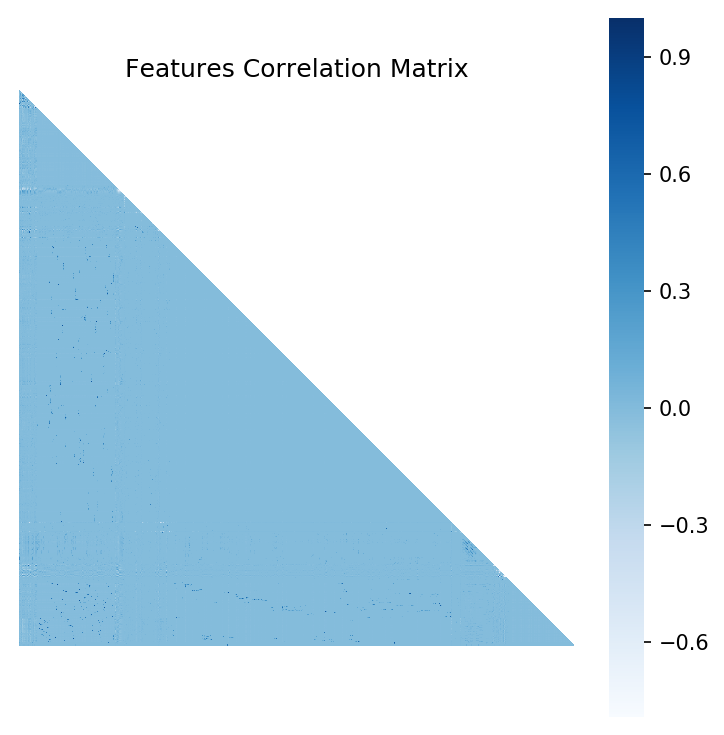

In [11]:
model_builder.corrmatrixplot(features)

## Main Conclusions 

The questions of interest are all significantly correlated with sale price:

* Total Sq. Feet of Living Space is positively correlated with Sale Price
  - 101833.2, P = 6.9e-272
* Waterfront Location is positively correlated with Sale Price
  - 14000.03, P = 6.6e-10
* Presence of Porch is positively correlated with Sale Price
  - 15155.58, P = 1.0e-26
* Presence of Noise Nuisance (e.g., airport, traffic) is negatively correlated with Sale Price
  - -5414.88, P = 0.000005

In addition to the features of interest, we also identified the following important features in predicting sale price. These are both positively and negatively correlated, and should be investigated further:
* Heating-related features (heat source, heating system) 
* Location-based features (area, zip code)
* Property use and condition features (condition, building grade, property type, present use)


Although these are all significant and we can reject the null hypothesis, we warn caution when evaluating these results since assumptions of linear regression were not met (mainly non-normal errors). However, this is to be expected since home sales are unlikely to be linear in nature, so linear regression may not be the ideal solution for this problem.

## Potential Model Improvements
We suggest the following actions to improve the performance of our model: 

* Detailed data validation
* Outlier detection and handling
* Correct for normal error distribution
* Feature engineering
* Explore other modeling techniques for non-linear prediction
